# Brest Cancer Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import CategoricalDtype
import os


In [2]:
print(os.getcwd())
#os.chdir("C:\\bb\\DataScience\\kaggle")

os.chdir("/home/dsuser08/DataScience/kaggle")

df = pd.read_csv("train.csv")

/home/dsuser08/DataScience/kaggle


In [3]:
df.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [4]:
df.describe()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,3405.761644
std,105.510663,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,1378.753666
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,431.000000
25%,92.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,2132.000000
50%,183.000000,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,3740.000000
75%,274.000000,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,4586.000000
max,365.000000,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,6043.000000


In [5]:
df.isna().sum()

id            0
season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [6]:
df2 = df.copy()


## k-means

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df.iloc[:,7:10])
    wcss.append(kmeans.inertia_)
    

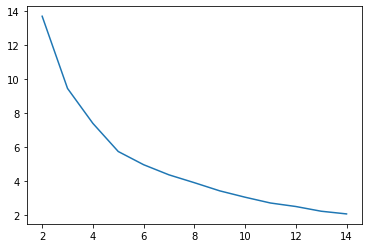

In [9]:
sns.lineplot(x=range(2, 15), y=wcss)

In [10]:
df.iloc[:,7:10]

,temp,atemp,hum
0,0.344167,0.363625,0.805833
1,0.363478,0.353739,0.696087
2,0.196364,0.189405,0.437273
3,0.200000,0.212122,0.590435
4,0.226957,0.229270,0.436957
...,...,...,...
360,0.325000,0.327633,0.762500
361,0.299130,0.279974,0.503913
362,0.248333,0.263892,0.574167
363,0.311667,0.318812,0.636667


In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df.iloc[:,7:10])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [12]:
df2['wcluster'] = kmeans.labels_

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


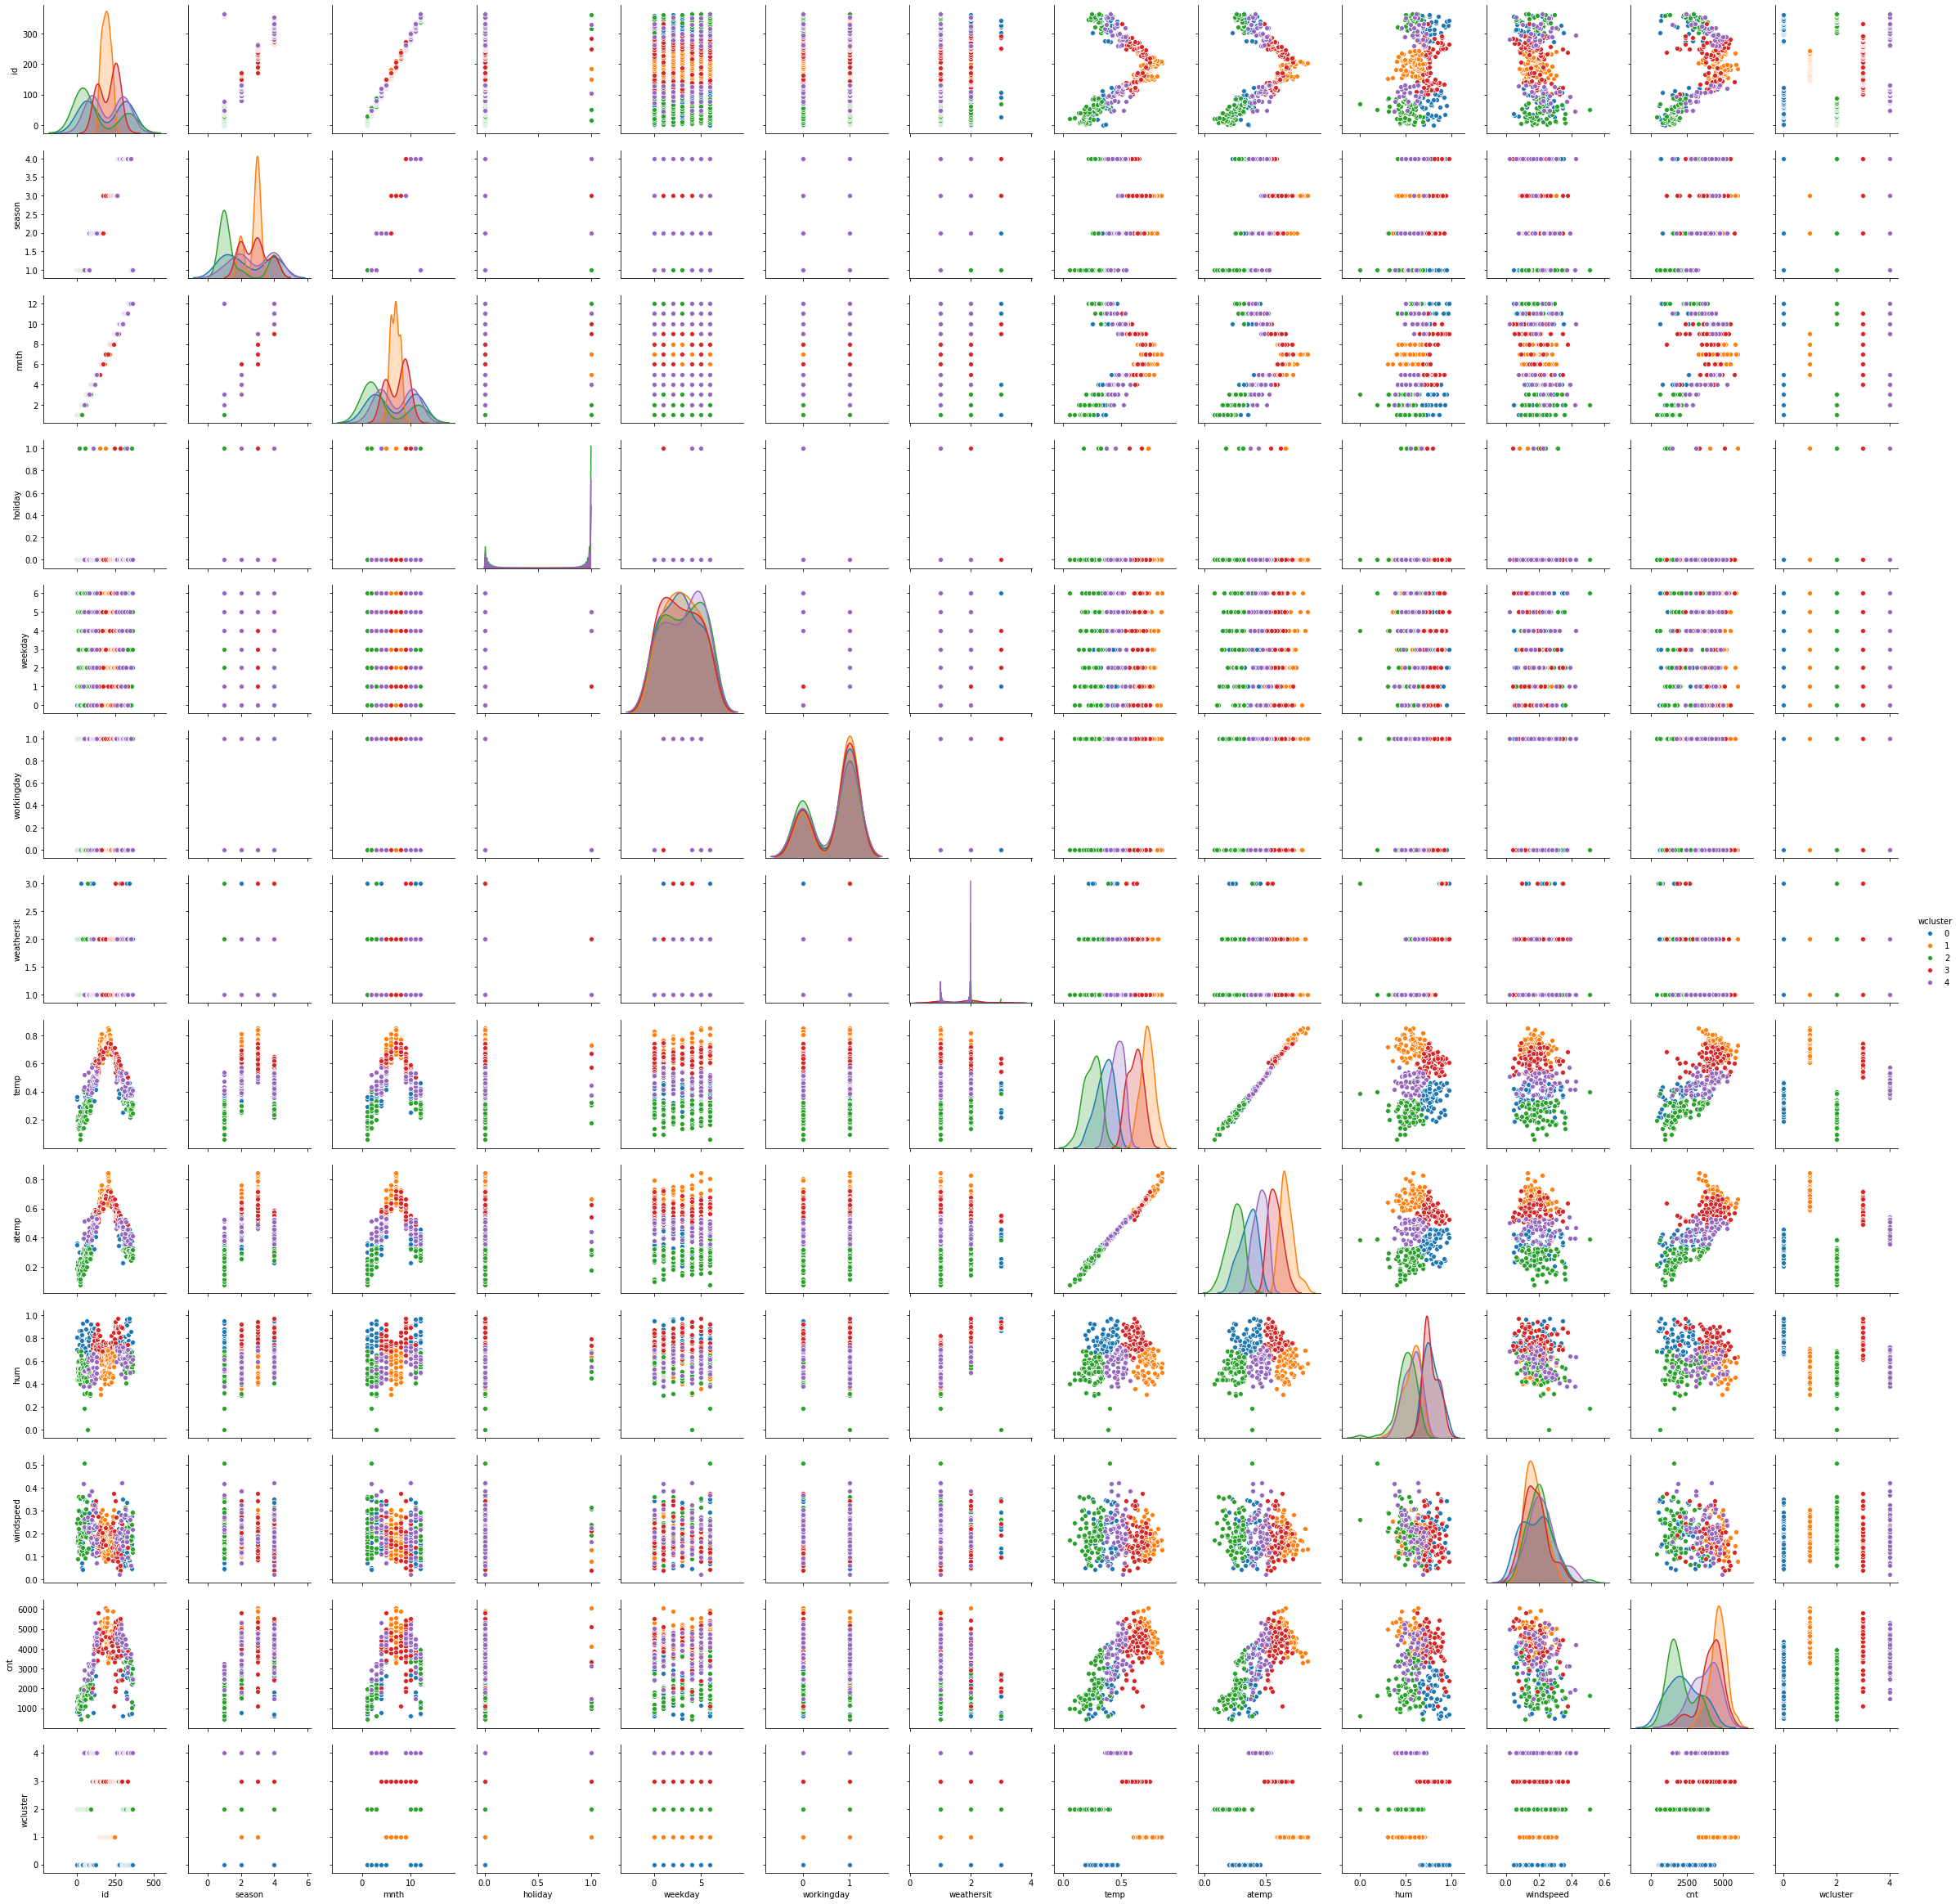

In [13]:
sns.pairplot(df2,hue="wcluster")

In [14]:
pd.crosstab(df2.cluster,df2.season)

AttributeError: 'DataFrame' object has no attribute 'cluster'

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, fcluster

In [ ]:
linked = linkage(df.iloc[:,1:10], 'ward')

labelList = range(2, 15)

In [ ]:
dn = dendrogram(linked,color_threshold=120)


In [ ]:
df2['hcluster'] = fcluster(linked, 6, criterion='maxclust')

In [ ]:
pd.crosstab(df2.cluster,df2.hcluster)

In [ ]:
df2.describe()

In [ ]:
df2.head()

### Store file in a new csv

In [ ]:
df2.to_csv("test_enriched.csv")